In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('netflix_titles.csv')


In [3]:
df.head()
df.info()
df.describe(include='all')
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.isnull().sum()
df.duplicated().sum()

0

In [5]:
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna("Unknown",inplace=True)
df.dropna(subset=['date_added'],inplace=True)

In [25]:
df['date_added']=pd.to_datetime(df['date_added'].str.strip(),errors='coerce')

In [26]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [27]:
df['duration']=df['duration'].replace('',np.nan)
df[['duration_value','duration_unit']]=df['duration'].str.extract(r'(\d+)\s*(\w+)')

In [28]:
df['title']=df['title'].str.strip().str.title()

Text(0.5, 1.0, 'movies vs tv shows')

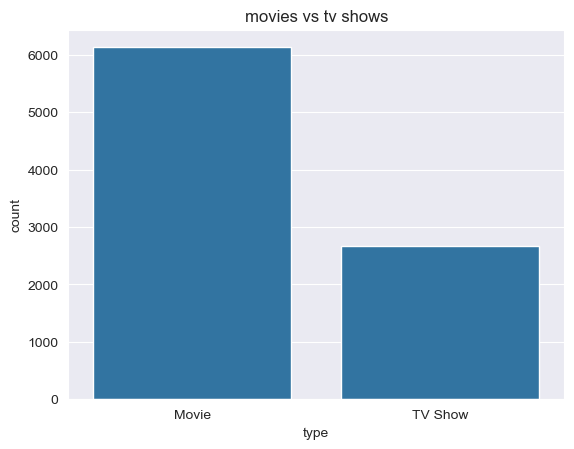

In [29]:
sns.countplot(data=df,x='type')
plt.title('movies vs tv shows')


Text(0.5, 1.0, 'Top 10 countries with most netflix Titles')

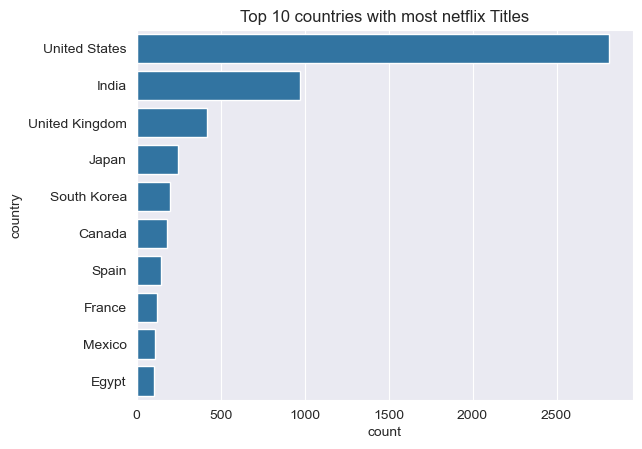

In [30]:
top_countries=df['country'].value_counts().head(10)
sns.barplot(x=top_countries,y=top_countries.index)
plt.title('Top 10 countries with most netflix Titles')

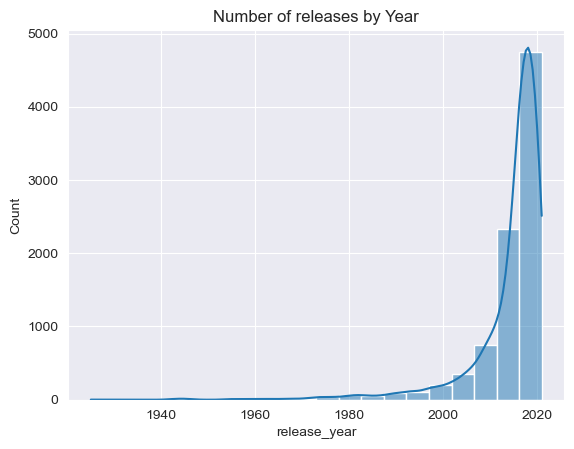

In [37]:
sns.histplot(df['release_year'],bins=20,kde=True)
plt.title("Number of releases by Year")
plt.savefig("no. of relesases.png")

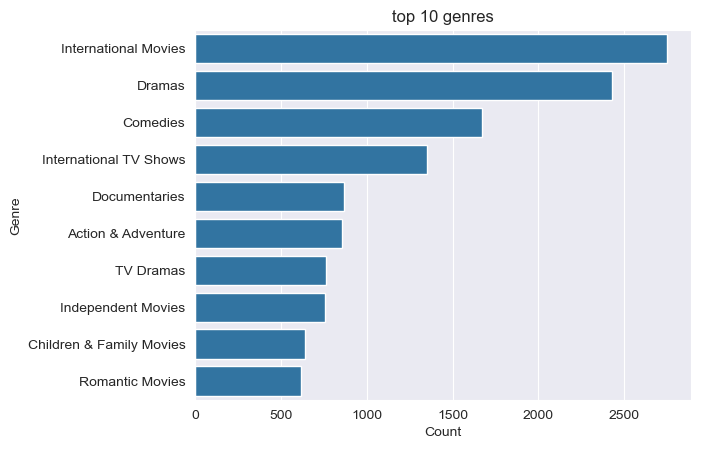

In [36]:
from collections import Counter
genre_list=df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres=[genre for sublist in genre_list for genre in sublist]
top_genres=Counter(all_genres).most_common(10)

genre_df=pd.DataFrame(top_genres,columns=['Genre',"Count"])
sns.barplot(data=genre_df,y='Genre',x='Count')
plt.title("top 10 genres")
plt.savefig('top_genres.png')

In [38]:
df.to_csv("cleaned_data.csv")

In [39]:
genre_spilt=df.assign(genre=df['listed_in'].str.split(', '))

genre_expanded=genre_spilt.explode('genre')

director_counts=(
    genre_expanded.groupby(['genre',"director"]).size().reset_index(name='count')

)

top_directors =director_counts.loc[director_counts.groupby('genre')['count'].idxmax()]
top_directors.sort_values('count',ascending=False).head(10)

,genre,director,count
8642,International TV Shows,Unknown,1222
10407,TV Dramas,Unknown,701
10347,TV Comedies,Unknown,532
8663,Kids' TV,Unknown,431
2641,Crime TV Shows,Unknown,400
9658,Romantic TV Shows,Unknown,341
3480,Docuseries,Unknown,334
9119,Reality TV,Unknown,249
743,British TV Shows,Unknown,227
718,Anime Series,Unknown,164


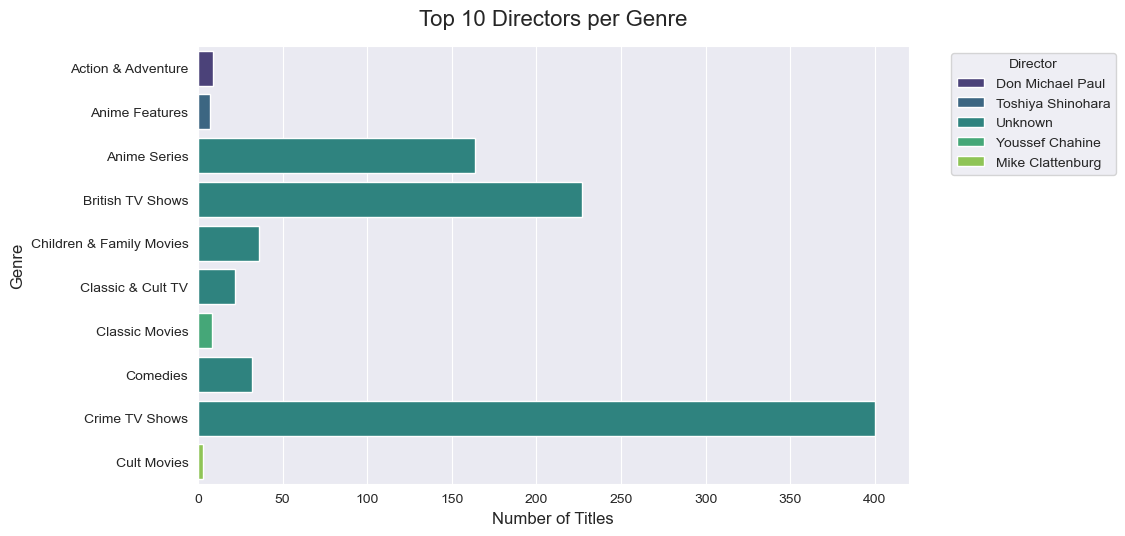

In [52]:
plt.figure(figsize=(12, 6))  # Larger figure for better visibility
sns.barplot(
    data=top_directors.head(10),
    x='count',
    y='genre',
    hue='director',
    palette='viridis'  # nice readable color palette
)

plt.title("Top 10 Directors per Genre", fontsize=16, pad=15)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.legend(title="Director", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=3.0)

# Save as high-quality image
plt.savefig('top_directors.png', dpi=200, bbox_inches='tight')
plt.show()


In [ ]:
avg_release_year = df.groupby('type')['release_year'].mean().reset_index()
sns.barplot(data=avg_release_year, x='type', y='release_year')
plt.title("Average Release Year: Movies vs TV Shows")
plt.show()



In [43]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


In [44]:
df['month_added'].unique()


array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October'],
      dtype=object)

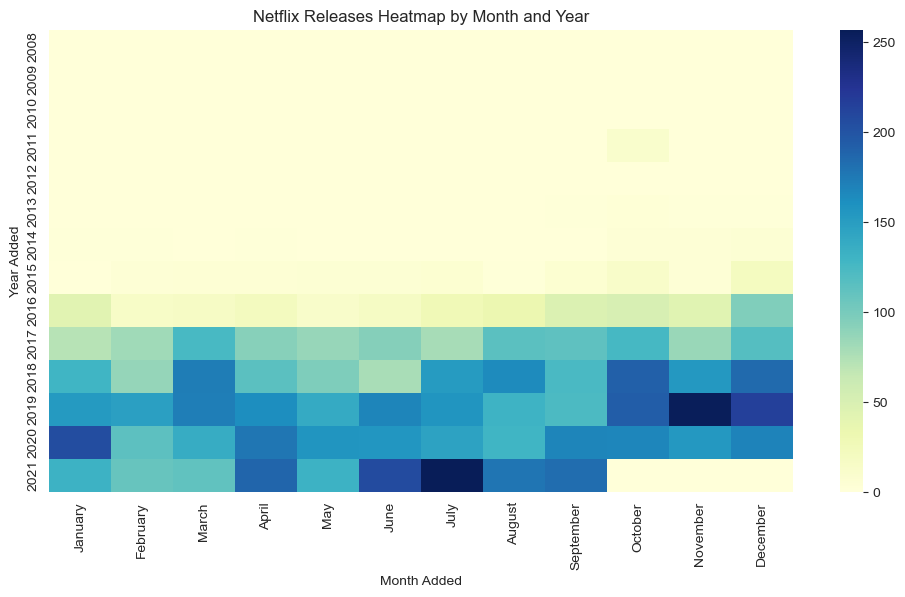

In [47]:
heatmap_data = df.pivot_table(
    index='year_added',
    columns='month_added',
    values='title',
    aggfunc='count',
    fill_value=0
)
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

heatmap_data = heatmap_data.reindex(columns=months_order)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Netflix Releases Heatmap by Month and Year')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()


In [48]:
df.to_csv("Cleaned Data.csv")